In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [70]:
pd.options.mode.chained_assignment = None  # default='warn'

# for the sake of diversity - not taking crime and adventure reduces significantly after animation is removed
genres_major = ['Drama', "Action", "Romance","Comedy"]

genres_major_add =  ['Drama', "Action", "Romance","Comedy","Adventure","Crime", "War", "Family", "Mystery"]

# remove genres which do not have a relation to actor features
genres_remove = ["Animation", "Biography", "Documentary","Short"]

# Will do major genres
from collections import defaultdict

def genre_exp(dataset, actor_keyword = "nconst", genre_keyword = "genres"):

    for x in genres_major_add:
        genre_label = x+"_exp_so_far"
        dataset[genre_label] = 0
        genre_exp_so_far = defaultdict(int)

        for row in dataset.iterrows():
            actor = row[1][actor_keyword]
            genres = row[1][genre_keyword].split(",")

            if x in genres:
                genre_exp_so_far[actor] += 1


            dataset.loc[row[0], genre_label] = genre_exp_so_far[actor]

    return dataset


# function removes certain genres and makes additional columns for each major genre marking which category the movie belongs to 

def extract_genres(dataset, genres_major=genres_major, genres_remove=genres_remove, genre_keyword ='genres', year_keyword='startYear'):

    x = []
    a = []


    # filter genres that we are not considering = [short, documentary, biography, animation]
    dataset_filtered = dataset[~dataset[genre_keyword].str.contains('|'.join(genres_remove))]

    # to store only movies and actors that have worked in the major genres
    movies_major = dataset_filtered[dataset_filtered[genre_keyword].str.contains('|'.join(genres_major))]

    # for i in genres_major:

    #     movies_major[i] = movies_major[genre_keyword].apply(lambda x: 1 if i in x else 0)

    movies_major.sort_values(by=year_keyword, ascending=True)

    for y in movies_major[genre_keyword]:

        if type(y) == str:
            x+= y.split(",")

    genres_all, counts = np.unique(x, return_counts=True)
    fig1 = plt.figure()
    genre_df = pd.DataFrame(list(zip(genres_all, counts)), columns=["genre", "count"])
    genre_df.sort_values('count',inplace=True, ascending = False)
    genre_df.reset_index(drop=True,inplace=True)
    genre_df.set_index('genre').plot(kind='bar', figsize=(13,4))

    fig2 = plt.figure(figsize=(9,9))
    df_draw = genre_df.copy()
    df_draw.loc[df_draw['count'] < 50000, 'genre'] = 'Others'

    exp = np.zeros(len(df_draw["genre"].unique()))
    exp[0:5] = 0.1

    df_draw = df_draw.groupby('genre')['count'].sum().reset_index()
    df_draw.sort_values('count',inplace=True, ascending = False)

    plt.pie(df_draw['count'], labels=df_draw['genre'], autopct='%.0f%%', explode=exp)
    plt.show()

    return genres_all, counts, movies_major

<Figure size 640x480 with 0 Axes>

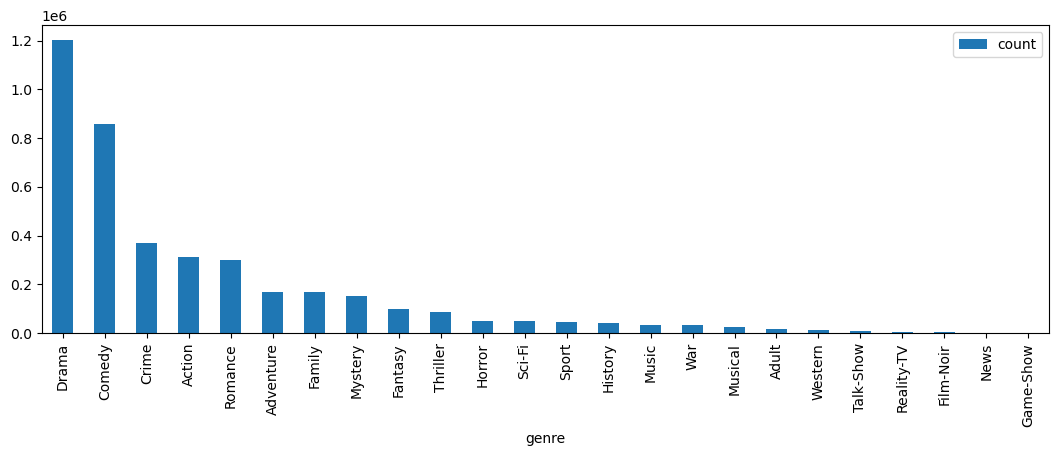

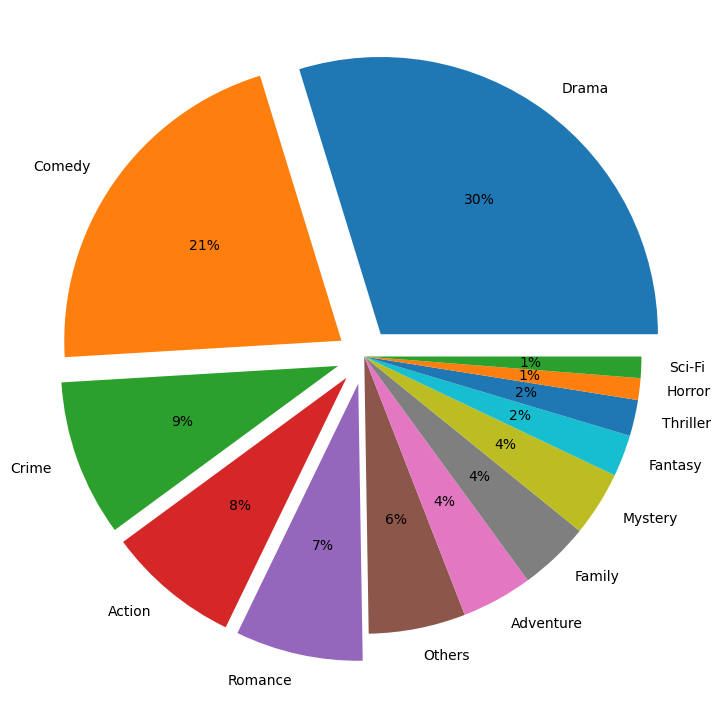

In [71]:
movies_popular = pd.read_csv("./data/actor_movie_combi.csv")

genres_popular, counts, mp = extract_genres(movies_popular)

# get genre experience for each movie-actor combination
movies_popular = genre_exp(mp)

movies_popular.to_csv("./data/actor_movie_combi_alive2.csv")

In [78]:
mp = pd.read_csv("./data/actor_movie_combi_alive2.csv")

,Unnamed: 0,tconst,ordering,nconst,gender,primaryName,birthYear,startYear,genres,age_at_movie_start,...,exp_so_far,Drama_exp_so_far,Action_exp_so_far,Romance_exp_so_far,Comedy_exp_so_far,Adventure_exp_so_far,Crime_exp_so_far,War_exp_so_far,Family_exp_so_far,Mystery_exp_so_far
0,11,tt0000009,2,nm0183823,0,William Courtenay,1875,1894.0,Romance,19.0,...,0,0,0,1,0,0,0,0,0,0
1,15,tt0000009,3,nm1309758,0,Chauncey Depew,1834,1894.0,Romance,60.0,...,0,0,0,1,0,0,0,0,0,0
2,18,tt0000009,1,nm0063086,1,Blanche Bayliss,1878,1894.0,Romance,16.0,...,0,0,0,1,0,0,0,0,0,0
3,49,tt1666737,1,nm0525908,0,Auguste Lumière,1862,1896.0,"Action,Comedy,Family",34.0,...,1,0,1,0,1,0,0,0,1,0
4,127,tt0000211,2,nm0617588,0,Georges Méliès,1861,1898.0,"Comedy,Fantasy,Horror",37.0,...,19,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976498,2962148,tt19394340,10,nm1201750,0,Erdem Akakçe,1976,2022.0,Drama,46.0,...,14,10,1,4,5,0,0,0,1,0
1976499,2962149,tt15747584,1,nm0314358,1,Claudia Gerini,1971,2022.0,Drama,51.0,...,51,19,3,9,28,1,8,0,0,3
1976500,2962150,tt13760918,1,nm1335387,0,Prithviraj Sukumaran,1982,2022.0,"Drama,Thriller",40.0,...,92,61,30,15,24,2,7,0,4,2
1976501,2962151,tt13760918,2,nm1011348,0,Indrajith Sukumaran,1979,2022.0,"Drama,Thriller",43.0,...,53,29,7,5,15,1,5,0,2,2


In [85]:
mp

,tconst,ordering,nconst,gender,primaryName,birthYear,startYear,genres,age_at_movie_start,averageRating,...,exp_so_far,Drama_exp_so_far,Action_exp_so_far,Romance_exp_so_far,Comedy_exp_so_far,Adventure_exp_so_far,Crime_exp_so_far,War_exp_so_far,Family_exp_so_far,Mystery_exp_so_far
0,tt0000009,2,nm0183823,0,William Courtenay,1875,1894.0,Romance,19.0,5.3,...,0,0,0,1,0,0,0,0,0,0
1,tt0000009,3,nm1309758,0,Chauncey Depew,1834,1894.0,Romance,60.0,5.3,...,0,0,0,1,0,0,0,0,0,0
2,tt0000009,1,nm0063086,1,Blanche Bayliss,1878,1894.0,Romance,16.0,5.3,...,0,0,0,1,0,0,0,0,0,0
3,tt1666737,1,nm0525908,0,Auguste Lumière,1862,1896.0,"Action,Comedy,Family",34.0,5.3,...,1,0,1,0,1,0,0,0,1,0
4,tt0000211,2,nm0617588,0,Georges Méliès,1861,1898.0,"Comedy,Fantasy,Horror",37.0,7.4,...,19,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976498,tt19394340,10,nm1201750,0,Erdem Akakçe,1976,2022.0,Drama,46.0,5.0,...,14,10,1,4,5,0,0,0,1,0
1976499,tt15747584,1,nm0314358,1,Claudia Gerini,1971,2022.0,Drama,51.0,5.8,...,51,19,3,9,28,1,8,0,0,3
1976500,tt13760918,1,nm1335387,0,Prithviraj Sukumaran,1982,2022.0,"Drama,Thriller",40.0,5.5,...,92,61,30,15,24,2,7,0,4,2
1976501,tt13760918,2,nm1011348,0,Indrajith Sukumaran,1979,2022.0,"Drama,Thriller",43.0,5.5,...,53,29,7,5,15,1,5,0,2,2


In [88]:
mp = pd.read_csv("./data/actor_movie_combi_alive2.csv")

# very less correlation between the two values
print(mp['averageRating'].corr(mp['numVotes']))

0.020572124058708972


In [91]:
task3_df = mp[mp["startYear"]>=2013]

unique_actors = task3_df["nconst"].unique()
male_actors = task3_df[task3_df["gender"] == 0]["nconst"].unique()
female_actors = task3_df[task3_df["gender"] == 1]["nconst"].unique()
print("There's a total of", len(unique_actors), "unique actors.")

print("There's a total of", len(male_actors), "male actors.")
print("There's a total of", len(female_actors), "female actors.")

There's a total of 59673 unique actors.
There's a total of 33912 male actors.
There's a total of 25764 female actors.


In [92]:
task3_df.to_csv("./data/Task3.csv", index=False)

In [103]:
task3_df = pd.read_csv("./data/Task3.csv")

# weighted average
c = ['Drama_exp_so_far', 'Action_exp_so_far',
       'Romance_exp_so_far', 'Comedy_exp_so_far', 'Adventure_exp_so_far',
       'Crime_exp_so_far', 'War_exp_so_far', 'Family_exp_so_far',
       'Mystery_exp_so_far']

#normal average
c2 =["averageRating", "numVotes"]

for x in c:
    values = task3_df[x]*task3_df.averageRating/10
    task3_df[x] = values

actors_genre_exp = pd.DataFrame()


actors_genre_exp[c] = task3_df.groupby("primaryName")[c].mean()
actors_genre_exp[c2] = task3_df.groupby("primaryName")[c2].mean()
actors_genre_exp["total_exp"] = task3_df.groupby("primaryName")["exp_so_far"].last()
actors_genre_exp["gender"] = task3_df.groupby("primaryName")["gender"].last()

actors_genre_exp

,Drama_exp_so_far,Action_exp_so_far,Romance_exp_so_far,Comedy_exp_so_far,Adventure_exp_so_far,Crime_exp_so_far,War_exp_so_far,Family_exp_so_far,Mystery_exp_so_far,averageRating,numVotes,total_exp,gender
primaryName,,,,,,,,,,,,,
'Legs' Larry Smith,0.000000,0.00,0.000000,1.220000,0.000000,0.000000,0.0,0.61,0.000000,6.100000,18.000000,1,0
'The Jinni' Ra'Shawn Vass,0.590000,0.00,0.000000,0.590000,0.000000,0.000000,0.0,0.00,0.000000,5.900000,7.000000,0,0
'Weird Al' Yankovic,0.000000,0.00,0.000000,4.805000,0.000000,0.000000,0.0,0.00,0.000000,6.300000,160.000000,21,0
2 Chainz,0.000000,0.00,0.000000,0.390000,0.000000,0.000000,0.0,0.00,0.000000,3.900000,87.000000,0,0
360,0.000000,0.88,0.000000,0.880000,0.000000,0.880000,0.0,0.00,0.000000,8.800000,6.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ünal Yeter,0.000000,0.00,0.335714,2.255714,0.000000,0.000000,0.0,0.00,0.000000,4.471429,285.142857,7,0
Þorsteinn Bachmann,20.279231,0.00,0.000000,4.260769,0.057308,2.578462,0.0,0.00,2.719231,6.873077,1937.538462,58,0
Þorsteinn Guðmundsson,5.364000,0.00,1.480000,2.444000,0.000000,3.884000,0.0,0.00,0.000000,7.400000,160.200000,14,0


In [ ]:
c_exp = ['exp_so_far','Drama_exp_so_far', 'Action_exp_so_far',
       'Romance_exp_so_far', 'Comedy_exp_so_far', 'Adventure_exp_so_far',
       'Crime_exp_so_far', 'War_exp_so_far', 'Family_exp_so_far',
       'Mystery_exp_so_far']

In [104]:
actors_genre_exp

,Drama_exp_so_far,Action_exp_so_far,Romance_exp_so_far,Comedy_exp_so_far,Adventure_exp_so_far,Crime_exp_so_far,War_exp_so_far,Family_exp_so_far,Mystery_exp_so_far,averageRating,numVotes,total_exp,gender
primaryName,,,,,,,,,,,,,
'Legs' Larry Smith,0.000000,0.00,0.000000,1.220000,0.000000,0.000000,0.0,0.61,0.000000,6.100000,18.000000,1,0
'The Jinni' Ra'Shawn Vass,0.590000,0.00,0.000000,0.590000,0.000000,0.000000,0.0,0.00,0.000000,5.900000,7.000000,0,0
'Weird Al' Yankovic,0.000000,0.00,0.000000,4.805000,0.000000,0.000000,0.0,0.00,0.000000,6.300000,160.000000,21,0
2 Chainz,0.000000,0.00,0.000000,0.390000,0.000000,0.000000,0.0,0.00,0.000000,3.900000,87.000000,0,0
360,0.000000,0.88,0.000000,0.880000,0.000000,0.880000,0.0,0.00,0.000000,8.800000,6.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ünal Yeter,0.000000,0.00,0.335714,2.255714,0.000000,0.000000,0.0,0.00,0.000000,4.471429,285.142857,7,0
Þorsteinn Bachmann,20.279231,0.00,0.000000,4.260769,0.057308,2.578462,0.0,0.00,2.719231,6.873077,1937.538462,58,0
Þorsteinn Guðmundsson,5.364000,0.00,1.480000,2.444000,0.000000,3.884000,0.0,0.00,0.000000,7.400000,160.200000,14,0


In [96]:

actors_genre_exp.to_csv("./data/Task3_final.csv", index=False)

# accumulate the weighted rating experience per genre into vectors for each actors
actors_genre_exp['all_genre_vector']= actors_genre_exp[['Drama_exp_so_far',
       'Action_exp_so_far', 'Romance_exp_so_far', 'Comedy_exp_so_far',
       'Adventure_exp_so_far', 'Crime_exp_so_far', 'War_exp_so_far',
       'Family_exp_so_far', 'Mystery_exp_so_far']].values.tolist()
actors_genre_exp['major_genre_vector']= actors_genre_exp[['Drama_exp_so_far',
       'Action_exp_so_far', 'Romance_exp_so_far', 'Comedy_exp_so_far',
       'Adventure_exp_so_far']].values.tolist()
actors_genre_exp.to_csv("./data/Task3_final.csv", index=False)

In [97]:
from scipy.stats import entropy
def normal_variance(vv):
    vv = vv/np.sum(vv)

    return entropy(vv, base=2)

actors_genre_exp["genre_entropy"] = actors_genre_exp["major_genre_vector"].apply(normal_variance)

actors_genre_exp


,Drama_exp_so_far,Action_exp_so_far,Romance_exp_so_far,Comedy_exp_so_far,Adventure_exp_so_far,Crime_exp_so_far,War_exp_so_far,Family_exp_so_far,Mystery_exp_so_far,averageRating,numVotes,total_exp,all_genre_vector,major_genre_vector,genre_entropy
primaryName,,,,,,,,,,,,,,,
'Legs' Larry Smith,0.000000,0.00,0.000000,1.220000,0.000000,0.000000,0.0,0.61,0.000000,6.100000,18.000000,1,"[0.0, 0.0, 0.0, 1.22, 0.0, 0.0, 0.0, 0.61, 0.0]","[0.0, 0.0, 0.0, 1.22, 0.0]",0.000000
'The Jinni' Ra'Shawn Vass,0.590000,0.00,0.000000,0.590000,0.000000,0.000000,0.0,0.00,0.000000,5.900000,7.000000,0,"[0.5900000000000001, 0.0, 0.0, 0.5900000000000...","[0.5900000000000001, 0.0, 0.0, 0.5900000000000...",1.000000
'Weird Al' Yankovic,0.000000,0.00,0.000000,4.805000,0.000000,0.000000,0.0,0.00,0.000000,6.300000,160.000000,21,"[0.0, 0.0, 0.0, 4.805, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 4.805, 0.0]",0.000000
2 Chainz,0.000000,0.00,0.000000,0.390000,0.000000,0.000000,0.0,0.00,0.000000,3.900000,87.000000,0,"[0.0, 0.0, 0.0, 0.39, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.39, 0.0]",0.000000
360,0.000000,0.88,0.000000,0.880000,0.000000,0.880000,0.0,0.00,0.000000,8.800000,6.000000,0,"[0.0, 0.8800000000000001, 0.0, 0.8800000000000...","[0.0, 0.8800000000000001, 0.0, 0.8800000000000...",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ünal Yeter,0.000000,0.00,0.335714,2.255714,0.000000,0.000000,0.0,0.00,0.000000,4.471429,285.142857,7,"[0.0, 0.0, 0.33571428571428574, 2.255714285714...","[0.0, 0.0, 0.33571428571428574, 2.255714285714...",0.556197
Þorsteinn Bachmann,20.279231,0.00,0.000000,4.260769,0.057308,2.578462,0.0,0.00,2.719231,6.873077,1937.538462,58,"[20.279230769230768, 0.0, 0.0, 4.2607692307692...","[20.279230769230768, 0.0, 0.0, 4.2607692307692...",0.688113
Þorsteinn Guðmundsson,5.364000,0.00,1.480000,2.444000,0.000000,3.884000,0.0,0.00,0.000000,7.400000,160.200000,14,"[5.364, 0.0, 1.48, 2.444, 0.0, 3.8840000000000...","[5.364, 0.0, 1.48, 2.444, 0.0]",1.386489


In [105]:
actors_genre_exp.nlargest(20, "numVotes")

,Drama_exp_so_far,Action_exp_so_far,Romance_exp_so_far,Comedy_exp_so_far,Adventure_exp_so_far,Crime_exp_so_far,War_exp_so_far,Family_exp_so_far,Mystery_exp_so_far,averageRating,numVotes,total_exp,gender
primaryName,,,,,,,,,,,,,
Leonardo DiCaprio,13.870000,3.570000,5.250000,3.550000,3.570000,1.500000,0.000000,0.750000,0.000000,7.500000,654976.500000,41,0
Robert Downey Jr.,13.255556,9.804444,3.705556,24.357778,7.482222,6.591111,2.223333,0.803333,2.964444,7.411111,648049.444444,76,0
Caleb McLaughlin,1.065000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000,595739.500000,1,0
Gaten Matarazzo,0.760000,0.000000,0.000000,0.325000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,594385.500000,1,0
Anna Shaffer,0.820000,0.820000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,8.200000,492117.000000,2,1
Darko Peric,0.820000,0.820000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,8.200000,476787.000000,0,0
Mackenzie Foy,1.797500,1.455000,0.000000,1.455000,2.017500,0.000000,0.000000,0.887500,0.000000,7.275000,456112.250000,9,1
Chris Hemsworth,6.568462,6.888462,3.411538,1.190000,5.101538,0.663846,0.000000,0.682308,0.000000,6.823077,421597.461538,33,0
Orto Ignatiussen,0.995000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000,414046.000000,2,0


In [102]:
female_actors = actors_genre_exp[actors_genre_exp["gender"] == 1]

male_actors = actors_genre_exp[actors_genre_exp["gender"] == 0]

KeyError: 'gender'

In [101]:
#movies_genx = pd.read_csv("./data/Task3_final.csv")

movies_genx
# accumulate the weighted rating experience per genre into vectors for each actors
task3_df['all_genre_vector']= task3_df[['Drama_exp_so_far',
       'Action_exp_so_far', 'Romance_exp_so_far', 'Comedy_exp_so_far',
       'Adventure_exp_so_far', 'Crime_exp_so_far', 'War_exp_so_far',
       'Family_exp_so_far', 'Mystery_exp_so_far']].values.tolist()
task3_df['major_genre_vector']= task3_df[['Drama_exp_so_far',
       'Action_exp_so_far', 'Romance_exp_so_far', 'Comedy_exp_so_far',
       'Adventure_exp_so_far']].values.tolist()
task3_df.to_csv("./data/Task3_final.csv", index=False)